# Ієрархічні методи
## Одинарне зв'язування

In [82]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

index = ['A','B','C','D','E','F','G','H','I','J']
data = pd.DataFrame({
    'X':[2,7,3,5,7,6,6,8,2,3],
    'Y':[4,3,5,3,4,8,5,4,5,7]
    }, index=index)
data

,X,Y
A,2,4
B,7,3
C,3,5
D,5,3
E,7,4
F,6,8
G,6,5
H,8,4
I,2,5
J,3,7


### Plot clusters

In [99]:
def cluster_plot(X_dat, y_dat, x_coord=0, y_coord=1, 
                 labels=[], cen_x=[], cen_y=[], leg=True, 
                 noise=False, noise_i=-1, n_clust=0, seed=0):
    # Validate input data
    assert n_clust >= 0
    # Seed for data replication
    np.random.seed(seed)
    # Find number of clusters if not specified
    if n_clust == 0:
        denoise_lst = list(filter(lambda y: y >= 0, y_dat))
        n_clust = len(np.unique(denoise_lst))
    # normalize color, so each one represents from 30 to 230 RGB intensity
    # and its values lie between 30/255 to 230/255
    # this way the colors would not look very dark or light
    color = np.random.rand(n_clust,3)
    color = 30/255 + color*200/255
    for i in range(n_clust):
        # Name clusters if their labels specified
        if any(labels):
            label = labels[i]
        else:
            label = f'Cluster {i+1}'
        plt.scatter(X_dat[y_dat==i,x_coord],
                       X_dat[y_dat==i,y_coord],
                       s=50,
                       c=color[i],
                       marker='o',
                       label=label)
    # Plot centroids
    if any(cen_x):
        assert len(cen_x) == len(cen_y)
        plt.scatter(cen_x,
                   cen_y,
                   s=50,
                   marker='*',
                   c='orangered',
                   label='Centroid')
    # Plot noise
    if noise:
        plt.scatter(X_dat[y_dat == noise_i, x_coord], 
                    X_dat[y_dat == noise_i, y_coord],
                    c='lightgray', marker='o', s=10,
                    label='Noise')
    if leg:
        plt.legend()
    plt.tight_layout()
    plt.show()

### Distance matrix

In [84]:
data_dist = pd.DataFrame(squareform(
        pdist(data, metric='euclidean')),
        columns=index, index=index)
data_dist

,A,B,C,D,E,F,G,H,I,J
A,0.000000,5.099020,1.414214,3.162278,5.000000,5.656854,4.123106,6.000000,1.000000,3.162278
B,5.099020,0.000000,4.472136,2.000000,1.000000,5.099020,2.236068,1.414214,5.385165,5.656854
C,1.414214,4.472136,0.000000,2.828427,4.123106,4.242641,3.000000,5.099020,1.000000,2.000000
D,3.162278,2.000000,2.828427,0.000000,2.236068,5.099020,2.236068,3.162278,3.605551,4.472136
E,5.000000,1.000000,4.123106,2.236068,0.000000,4.123106,1.414214,1.000000,5.099020,5.000000
F,5.656854,5.099020,4.242641,5.099020,4.123106,0.000000,3.000000,4.472136,5.000000,3.162278
G,4.123106,2.236068,3.000000,2.236068,1.414214,3.000000,0.000000,2.236068,4.000000,3.605551
H,6.000000,1.414214,5.099020,3.162278,1.000000,4.472136,2.236068,0.000000,6.082763,5.830952
I,1.000000,5.385165,1.000000,3.605551,5.099020,5.000000,4.000000,6.082763,0.000000,2.236068
J,3.162278,5.656854,2.000000,4.472136,5.000000,3.162278,3.605551,5.830952,2.236068,0.000000


In [85]:
data_clust = linkage(data.values,
                   method='single', # complete
                   metric='euclidean')
pd.DataFrame(data_clust,
            columns = [
                'row label 1',
                'row label 2',
                'distance',
                'number of items in cluster'
            ],
            index = ['cluster %d' % (i+1) for i in
                    range(data_dist.shape[0]-1)])

,row label 1,row label 2,distance,number of items in cluster
cluster 1,0.0,8.0,1.000000,2.0
cluster 2,2.0,10.0,1.000000,3.0
cluster 3,1.0,4.0,1.000000,2.0
cluster 4,7.0,12.0,1.000000,3.0
cluster 5,6.0,13.0,1.414214,4.0
cluster 6,9.0,11.0,2.000000,4.0
cluster 7,3.0,14.0,2.000000,5.0
cluster 8,15.0,16.0,2.828427,9.0
cluster 9,5.0,17.0,3.000000,10.0


### Dendrogram

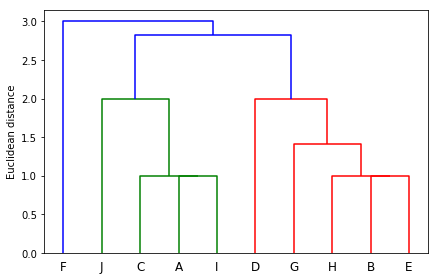

In [86]:
from scipy.cluster.hierarchy import dendrogram

data_dendr = dendrogram(data_clust,
                       labels=index)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### Heatmap

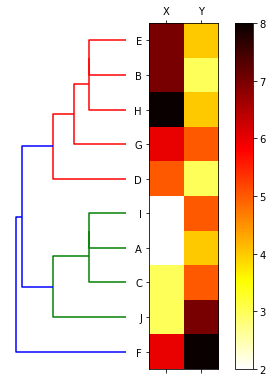

In [87]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(data_clust, orientation='left')

# reorder data with respect to clustering
df_rowclust = data.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([-0.03, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_yticks(np.arange(len(df_rowclust.index)))
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([] + list(df_rowclust.index))
plt.show()

### UPGMA

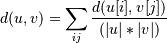

In [88]:
from IPython.display import Image
Image('lab3-1.png')

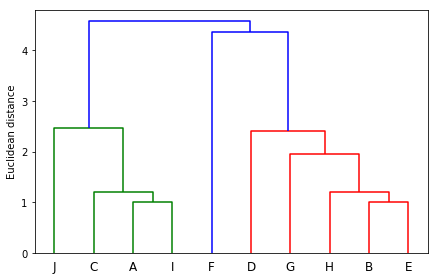

In [89]:
data_clust = linkage(data.values,
                   method='average',
                   metric='euclidean')
data_dendr = dendrogram(data_clust,
                       labels=index)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### WPGMA

In [90]:
Image('lab3-2.png')

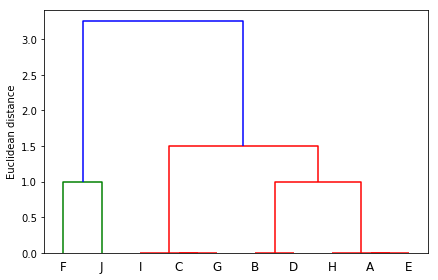

In [91]:
data_clust = linkage(data.values[:,1:],
                   method='weighted',
                   metric='euclidean')
data_dendr = dendrogram(data_clust,
                       labels=index)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

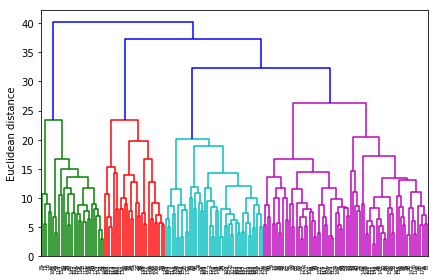

In [92]:
countries = pd.read_csv('countries.csv', header=0)
countries.loc[156, 'Alcohol consumption'] = 7.9
countries.index = countries.iloc[:,0]
countries = countries.iloc[:178,1:]

count_clust = linkage(countries.values,
                   method='weighted',
                   metric='euclidean')
count_dendr = dendrogram(count_clust,
                       labels=range(178))
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Gravitational methods
### k-means

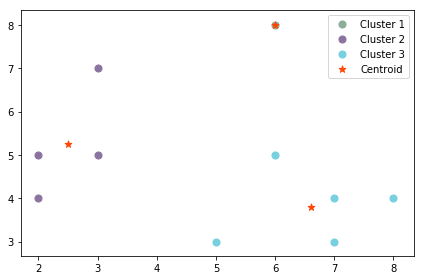

In [93]:
from sklearn.cluster import KMeans

X = data.values
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

cluster_plot(X, y_km, 
             cen_x=km.cluster_centers_[:,0], 
             cen_y=km.cluster_centers_[:,1])

### k-medoids

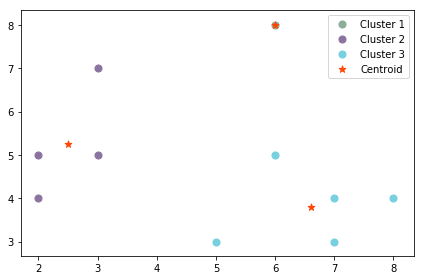

In [94]:
from pyclust import KMedoids

k_med = KMedoids(n_clusters=3, distance='euclidean')
yk_med = k_med.fit_predict(X)

cluster_plot(X, yk_med, 
             cen_x=km.cluster_centers_[:,0], 
             cen_y=km.cluster_centers_[:,1])

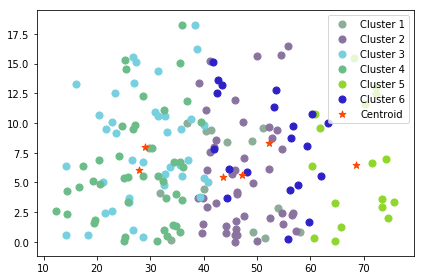

In [95]:
X = countries.values
km = KMeans(n_clusters=6,
           init='random',
           n_init=20,
           max_iter=300,
           tol=1e-05,
           random_state=6)
y_km = km.fit_predict(X)

cluster_plot(X, y_km, 
             cen_x=km.cluster_centers_[:,0], 
             cen_y=km.cluster_centers_[:,1])

## DBSCAN

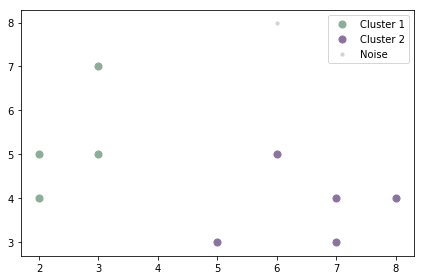

In [96]:
from sklearn.cluster import DBSCAN

X = data.values
db = DBSCAN(eps=2, min_samples=2, metric='euclidean')
y_db = db.fit_predict(X)

cluster_plot(X, y_db, noise=True)

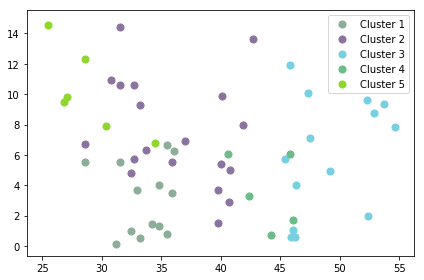

In [100]:
X = countries.values

db = DBSCAN(eps=6, min_samples=4, metric='euclidean')
y_db = db.fit_predict(X)

cluster_plot(X, y_db, noise=False)